In [1]:
import gym
import pandas as pd

from stable_baselines3 import PPO
from stable_baselines3.ppo.policies import MlpPolicy
from stable_baselines3.ppo.policies import CnnPolicy
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.env_util import make_vec_env

"A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every timestep that the pole remains upright. The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center." [CartPole-v1](https://gym.openai.com/envs/CartPole-v1/), 

<s>[Max episode length is 500](https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py), therefore the max reward is also 500.</s>

This is a custom version of CartPole that has a maximum for episode steps of 1000.

[Registering custom environments](https://stackoverflow.com/questions/42787924/why-is-episode-done-after-200-time-steps-gym-environment-mountaincar)

In [2]:
# No need to re-run unless output is cleared; registration is saved in PATH\TO\ENV\lib\site-packages\gym\envs\registration.py
# Re-running will throw UserWarning: PATH\TO\ENV\lib\site-packages\gym\envs\registration.py:595: 
# UserWarning: WARN: Overriding environment CartPole-1k
gym.envs.register(
    id="CartPole-v1k",
    entry_point="gym.envs.classic_control:CartPoleEnv",
    max_episode_steps=1000, # CartPole-v1 uses 500
    reward_threshold=975.0, # CartPole-v1 uses 475.0
)

In [3]:
# Create new model
env = make_vec_env('CartPole-v1k', n_envs=10)
model = PPO(
    policy=MlpPolicy, 
    env=env, 
    learning_rate=0.0003,
    n_steps=2048,
    batch_size=64,
    n_epochs=10,
    gamma=0.99,
    gae_lambda=0.95,
    clip_range=0.2,
    clip_range_vf=None,
    ent_coef=0.0,
    vf_coef=0.5,
    max_grad_norm=0.5,
    use_sde=False,
    sde_sample_freq=-1,
    target_kl=None,
    tensorboard_log=None,
    create_eval_env=False,
    policy_kwargs=None,
    verbose=1,
    seed=None,
    device='auto',
    _init_setup_model=True
    )

# Load existing model
# model = PPO.load("./models/cartpole-v1k/cartpole-v1k/cartpole_v1k_ppo_{timesteps}")

Using cuda device


In [ ]:
# Train model
timesteps = 500000

log_dir = "./out/training-log/"
log_path = log_dir + f"cartpole-v1k/"
save_dir = "./models/cartpole-v1k/"

# Train agent
model.learn(
        total_timesteps=timesteps, 
        callback=None,
        log_interval=-1,
        eval_env=gym.make('CartPole-v1k'), 
        eval_freq=10000/10, 
        n_eval_episodes=5,
        tb_log_name='PPO',
        eval_log_path=log_path, 
        reset_num_timesteps=False
        )

In [6]:
# Display log
import pandas as pd
from utils.utils import load_log

# Load logs and combine into one dataframe
log_dir = "./out/training-log/"
log_path = log_dir + f"cartpole-v1k/"

files = [
    log_path + "evaluations_to_510K.npz",
]

data = pd.concat([load_log(x) for x in files], axis='index')
data.sort_values(by='timesteps', inplace=True)

data

,mean_rew,mean_ep_length
timesteps,,
10000,449.2,449.2
20000,78.0,78.0
30000,289.8,289.8
40000,338.6,338.6
50000,306.6,306.6
60000,259.2,259.2
70000,233.4,233.4
80000,347.6,347.6
90000,508.8,508.8


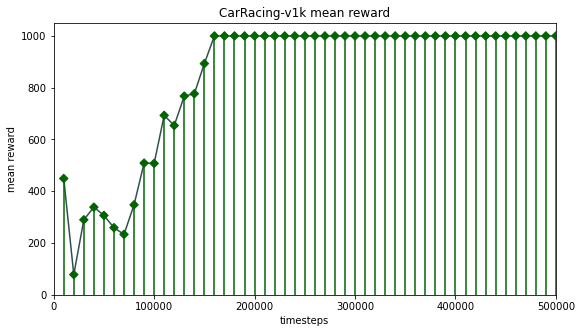

In [8]:
#  Show log as graphic
from utils.utils import plot_log


plot_log(data, title='CarRacing-v1k mean reward', axis=[0, 500000, 0, 1050])

In [ ]:
# Save model
save_dir = "./models/cartpole-v1k/"
name = "cartpole_v1k_ppo_510K"
model.save(save_dir + name)